# HYPOTHÈSE

Pour une carte C prise aléatoirement dans un ensemble E de 67 cartese en transformant la carte en format greyscale (nuance de gris) et en prenant 240 pixels répartis uniformément sur la surface de la carte grâce à un cadrillage. Nous pouvons compter le nombre de pixels de couleurs nbPX présents et en déduire la carte C qui lui correspond. On suppose qu'en analysant 240 pixels de la carte via un algorithme, il est possible de retrouver la carte originale. Notre hypothése est donc :  pour toute carte C il existe un seul ensemble de 240 pixels E qui définit cette dernière

<img src="https://latex.codecogs.com/svg.image?\sum_{1}^{240}&space;nbPX&space;C&space;&space;=&space;E&space;" title="\sum_{1}^{240} nbPX C = E " />

In [14]:
from matplotlib.pyplot import imshow
from math import *
import numpy as np
from PIL import Image
import os
%matplotlib inline

#IMPORTANT: Il faut démarrer les cellules de fonction et de test avant cette célulle

directory = r'cartes/PNG-cards-1.3/'
cardName = "8_of_hearts.png"
card = Image.open("cartes/PNG-cards-1.3/%s" % (cardName))

allCardResult = testAllCard()
rotateResult = testRotation(card)
zoomResult = testZoom(cardName)
GrayscaleResult = testGreyscale()
print("-----------------------------------------------")
print("Test des cartes sans modification: %i / 67 --> %i %%" % (allCardResult, allCardResult*100/67))
print("Test de toutes les rotations d'une carte donnée: %i / 180 --> %i %%" % (rotateResult, rotateResult*100/180))
print("Test de tous les zoom sur toutes les cartes %i / 15 --> %i %%" % (zoomResult, zoomResult*100/15))
print("Test de toutes les cartes convertis en LA: %i / 67 --> %i %%" % (GrayscaleResult, GrayscaleResult*100/67))
print("Resutat de tous les test: %i %%" % (int((allCardResult+rotateResult+zoomResult+GrayscaleResult)*100/329)))

Test carte 1 réussi
Test carte 2 réussi
Test carte 3 réussi
Test carte 4 réussi
Test carte 5 réussi
Test carte 6 réussi
Test carte 7 réussi
Test carte 8 réussi
Test carte 9 réussi
Test carte 10 réussi
Test carte 11 réussi
Test carte 12 réussi
Test carte 13 réussi
Test carte 14 réussi
Test carte 15 réussi
Test carte 16 réussi
Test carte 17 réussi
Test carte 18 réussi
Test carte 19 réussi
Test carte 20 réussi
Test carte 21 réussi
Test carte 22 réussi
Test carte 23 réussi
Test carte 24 réussi
Test carte 25 réussi
Test carte 26 réussi
Test carte 27 réussi
Test carte 28 réussi
Test carte 29 réussi
Test carte 30 réussi
Test carte 31 réussi
Test carte 32 réussi
Test carte 33 réussi
Test carte 34 réussi
Test carte 35 réussi
Test carte 36 réussi
Test carte 37 réussi
Test carte 38 réussi
Test carte 39 réussi
Test carte 40 réussi
Test carte 41 réussi
Test carte 42 réussi
Test carte 43 réussi
Test carte 44 réussi
Test carte 45 réussi
Test carte 46 réussi
Test carte 47 réussi
Test carte 48 réussi
T

In [1]:
def compare(cardTest): #Fonction qui compare les pixels en quadrillage
    
    infoBreak = False
    listCard = os.listdir(directory)
    
    #Un quadrillage en % permet d'avoir les mêmes résultat peut importe le zoom
    step = int(cardTest.size[0]*0.15)
    step2 = int(cardTest.size[1]*0.025)
    
    for filename in listCard:
        if filename.endswith(".png"):
            cardTemp = Image.open("cartes/PNG-cards-1.3/%s" % (filename))
            cardTempGrayscaled = cardTemp.convert('LA')
            
            for x in range(0 , cardTest.width, step):
                if infoBreak == True:
                    infoBreak = False
                    break
                for y in range(0, cardTest.height, step2):
                    tab = []
                    tab2 = []
                    tab3 = []
                    tab.append(cardTest.getpixel((x,y)))
                    tab2.append(cardTemp.getpixel((x,y)))
                    tab3.append(cardTempGrayscaled.getpixel((x,y)))
                    if tab != tab2 and tab != tab3:
                        infoBreak = True
                        break
                if infoBreak == False and x > cardTest.width-step-1:
                    return filename
                    
                        

In [15]:
def calcRotation(card):
    
    valRotation = 0
    
    
    if card.size[0] == 500 and card.size[1] == 726:
        return 0
    if card.size[0] == 726 and card.size[1] == 500:
        return 90
    
    #On cherche les pixels noirs 
    for x in range(0,30):
        for y in range(0, card.width):
            (r,g,b,a) = card.getpixel((y,x))
            if (a == 0):
                continue
            elif b == 255:
                (aX, aY) = (y, x)
                break
        else:
            continue
        break
    for x in range(0, 30):
        for y in range(0, card.height):
            (r,g,b,a) = card.getpixel((x,y))
            if (a == 0):
                continue
            elif (b == 255):
                (bX, bY) = (x, y)
                break
        else:
            continue
        break
        
    longueurHypotenus = sqrt((aX-bX)**2+(bY-aY)**2)
    longueurOppose =bY-aY
    longueurAdja = aX-bX
    #print(longueurHypotenus)
    #print(longueurAdja)

    radian = asin(longueurAdja / longueurHypotenus)
    degree = (90-degrees(radian))
    if longueurHypotenus > 600:
        degree += 90
    #print(degree)
    
    return int(round(degree))

# TEST

In [3]:
def testAllCard():
    
    directory = r'cartes/PNG-cards-1.3/'
    resultTest = 0
    i = 1
    
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            card = Image.open("cartes/PNG-cards-1.3/%s" % (filename))
            result = compare(card)
            if result == filename:
                print("Test carte %i réussi\r" % (i))
                resultTest = resultTest + 1
            else:
                print("Test carte %i échoué\r" % (i))
        i = i + 1
    
    print("%i / 67" % (resultTest))
    print("%i %%" % (resultTest*100/67))
    return resultTest

In [13]:
def testRotation(card):
    resultTest = 0
    for x in range(0,180):
        card.putpixel((0,0), (0,0,255,255))
        card.putpixel((499,0), (0,0,255,255))
        card.putpixel((0,725), (0,0,255,255))
        card.putpixel((499,725), (0,0,255,255))
        rotatedCard = card.rotate(x, expand=True)
        valRotation = calcRotation(rotatedCard)
        if (valRotation == x or (x == 180 and valRotation == 0)):
            print("Test rotation %i réussi" % (x))
            resultTest = resultTest + 1
        else: print("Test rotation %i ECHEC" % (x))
    
    print("%i / 180" % (resultTest))
    print("%i %%" % (resultTest*100/180))
    return resultTest

In [5]:
def testZoom(cardName):
    
    resultTestZoom = 0
    directory = r'cartes/PNG-cards-1.3/'
    i = 1
    
    for x in np.arange(0.5, 2, 0.1):
        
        resultTestCard = 0
        
        
        card = Image.open("cartes/PNG-cards-1.3/%s" % (cardName))
        zoom = card.resize((int(card.size[0]*x), int(card.size[1]*x)))
        result = compare(card)
        if result == cardName:
            print("Test zoom %i réussi" % (i))
            resultTestZoom += 1
        else:
            print("Test %i échoué" % (i))
        i = i + 1
    print("%i / 15" % (resultTestZoom))
    print("%i %%" % (resultTestZoom*100/15))
    return resultTestZoom

In [6]:
def testGreyscale():
    
    directory = r'cartes/PNG-cards-1.3/'
    resultTest = 0
    i = 1
    
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            card = Image.open("cartes/PNG-cards-1.3/%s" % (filename))
            card = card.convert('LA')
            result = compare(card)
            if result == filename:
                print("Test carte LA %i réussi" % (i))
                resultTest = resultTest + 1
            else:
                print("Test %i échoué" % (i))
        i = i + 1
    
    print("%i / 67" % (resultTest))
    print("%i %%" % (resultTest*100/67))
    return resultTest

# AUTRE

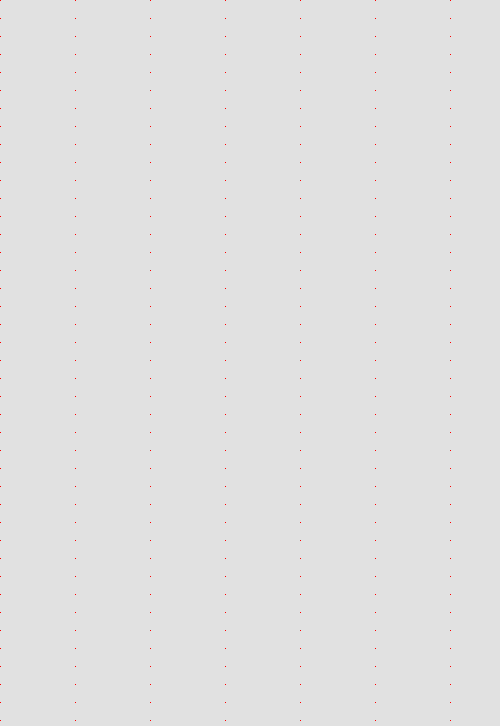

In [11]:
#Programme qui illustre les pixels testé en rouge

cardName = "8_of_hearts.png"
card = Image.open("cartes/PNG-cards-1.3/%s" % (cardName))

#imshow(card)

step = int(card.size[0]*0.15)
step2 = int(card.size[1]*0.025)
    
for x in range(0 , card.width):
    for y in range(0, card.height):
        (r,g,b,a) = card.getpixel((x,y))
        if x%step != 0 or y%step2 != 0:
            card.putpixel((x,y), (225,225,225))
        else:
            card.putpixel((x,y), (255,0,0,255))
card.show()